### Advertising Sales Channel Prediction

In [1]:
#import all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge

from sklearn.preprocessing import (StandardScaler,
                                  PolynomialFeatures)
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats.mstats import normaltest
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading Dataset
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#info about the data shape ,datatype of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# To check null values
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [5]:
# To check for duplicated values
df.duplicated().sum()

0

In [6]:
# To drop 'Unnamed: 0' column as it is an index column.
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
#to get statistical summary of each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


<AxesSubplot:xlabel='TV', ylabel='sales'>

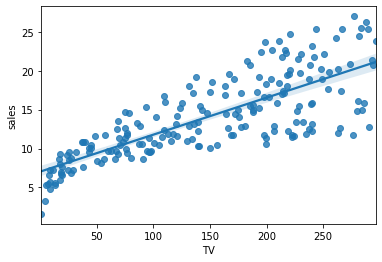

In [8]:
sns.regplot(x='TV',y='sales',data=df)

tv and sales have positive linear relationship,with increase in tv ads the sales are also going up.

<AxesSubplot:xlabel='radio', ylabel='sales'>

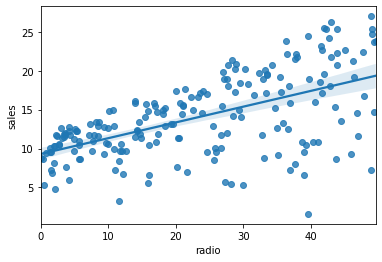

In [9]:
sns.regplot(x='radio',y='sales',data=df)

Radio and sale have linear relationship

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

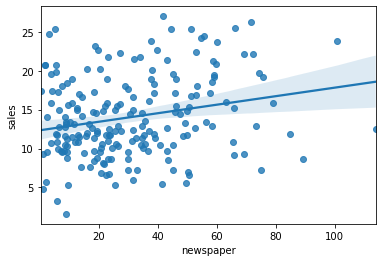

In [10]:
sns.regplot(x='newspaper',y='sales',data=df)

newspaper and sales have no relationship.

<AxesSubplot:xlabel='sales', ylabel='Density'>

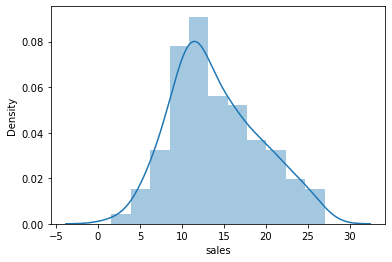

In [11]:
#plots to see the distribution of continuous features
sns.distplot(df["sales"])


<AxesSubplot:xlabel='TV', ylabel='Density'>

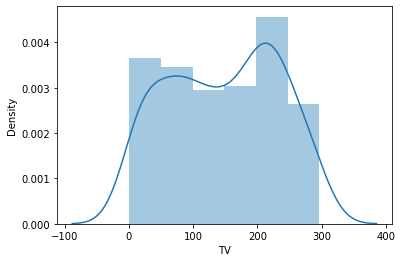

In [12]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='radio', ylabel='Density'>

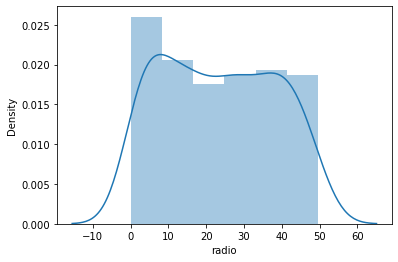

In [13]:
sns.distplot(df["radio"])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

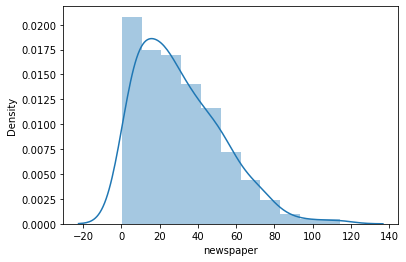

In [14]:
sns.distplot(df["newspaper"])

In [15]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

TV and radio are normally distributed whereas newspaper is right skewed and sales has left skewness.

<function matplotlib.pyplot.show(close=None, block=None)>

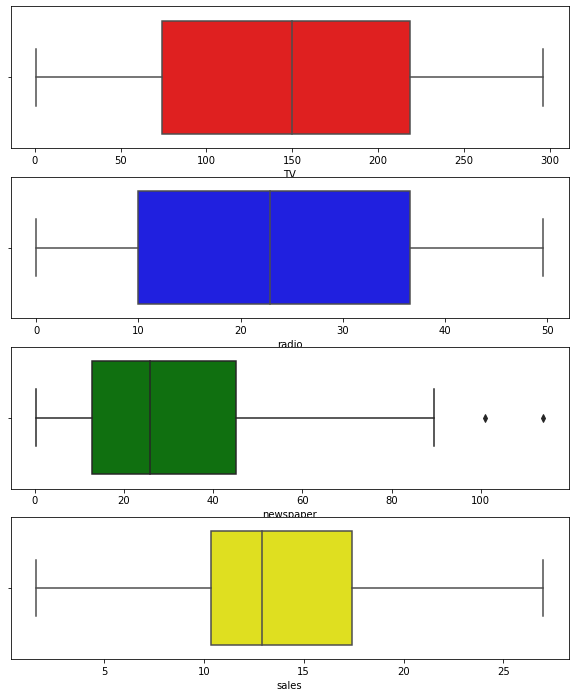

In [16]:
#checking for the outliers
plt.figure(figsize=(10,12))
plt.subplot(4,1,1)
sns.boxplot(x= df.TV,color='red')

plt.subplot(4,1,2)
sns.boxplot(x= df.radio,color='blue')

plt.subplot(4,1,3)
sns.boxplot(x= df.newspaper,color='green')

plt.subplot(4,1,4)
sns.boxplot(x= df.sales,color='yellow')

plt.show

There is no outliers present although we can see two in newspaper which can be ignored

<AxesSubplot:>

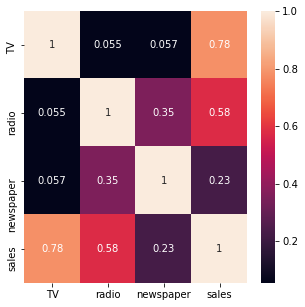

In [17]:
plt.figure(figsize =(5,5))
sns.heatmap(df.corr(),annot=True)

In [18]:
#to check correlation
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


sales and newspaper shows no relation, where as TV has positive correlation with sales.

In [19]:
from scipy.stats import zscore  #Importing requried library.

z = np.abs(zscore(df))
z.shape

(200, 4)

In [20]:
threshold=3                  #keeping threshold value as 3.
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))


In [21]:
loss_percent=(200-198)/200*100
print(loss_percent)   

1.0


After removing skewness - total data lost is 1.00%

In [22]:
#splitting dataset into x and y.

y = df['sales']
x = df.drop(columns=['sales'])

In [23]:
x.head()  #showing dataset without sales.

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [24]:
y.head()  #showing only sales dataset.

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [25]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled 

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [26]:
# Split data into train and test. Model will be built on training data and tested on test data
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)
y_train

123    15.2
141    19.2
54     20.2
196     9.7
171    14.5
       ... 
192     5.9
33     17.4
177    11.7
34      9.5
132     5.7
Name: sales, Length: 150, dtype: float64

In [27]:
# Model instantiating and training

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [28]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

14.052151873806318
[ 3.9699804   2.75712602 -0.06831687]


In [29]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.8941814100449432

In [30]:
y_pred = regression.predict(x_test)
y_pred

array([ 9.96204612, 19.83098403, 18.5409126 , 20.41193814, 21.76239284,
        5.78585213, 14.21851349,  9.77481642, 20.48709552, 10.7181551 ,
       10.16845614, 12.03533985, 18.83494548,  8.16446482, 12.22754209,
       16.45397605, 10.43136755, 13.78242439, 12.48378685, 24.80926582,
       16.28744899,  7.75363536, 14.34418163, 19.28487199,  6.04666663,
       11.6386731 ,  9.81129551, 14.88142594, 20.48811346, 11.60713243,
       11.61056558, 14.04886587, 21.13827011, 13.2458157 , 15.29325678,
       18.6372091 , 15.04030688, 15.33387464,  8.44032706, 17.84612912,
       11.35239965,  6.57374712, 13.96305655, 23.18161799,  7.06859439,
       12.79389237, 16.18134743, 17.80551319, 12.08878538,  9.85907935])

In [31]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
73,11.0,9.962046
109,19.8,19.830984
193,19.6,18.540913
104,20.7,20.411938
42,20.7,21.762393
60,8.1,5.785852
19,14.6,14.218513
186,10.3,9.774816
0,22.1,20.487096
180,10.5,10.718155


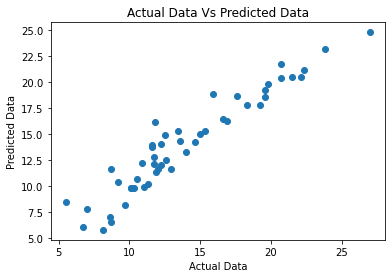

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV          #importing requried lib.

print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 1.1547282167263322
Mean squared error : 2.2171650201222404
Root mean squared error : 1.4890147817003834


In [34]:
#Lasso Regularization 
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [35]:
alpha = lasscv.alpha_
alpha

0.007940190161617847

In [36]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.007940190161617847)

In [37]:
lasso_reg.score(x_test,y_test)

0.9069025923174852

In [38]:
#building ridge regression
svr = SVR(kernel = 'rbf')
svr=svr.fit(x_train,y_train)
x_test_s = scaler.transform(x_test)
y_pred_bc = svr.predict(x_test)

In [39]:
y_pred1 = svr.predict(x_test)
y_pred1

array([10.74388573, 18.58141812, 18.34024507, 19.85982349, 18.40355073,
        8.05311718, 14.86627128, 10.40454413, 21.26417909, 11.02184357,
       10.6485324 , 12.47211331, 15.47467307,  9.6732996 , 10.59647383,
       16.70375304, 10.53017939, 11.92824762, 12.36932929, 22.8685113 ,
       17.36651287,  9.20843424, 13.13475548, 20.50690259,  7.51723517,
       11.72003624,  9.44220865, 12.56251685, 21.58610621, 11.44627816,
       13.05908939, 12.25881085, 21.91824166, 13.38673033, 14.91030583,
       17.4589285 , 15.71241098, 13.50322072,  8.45535757, 18.29660535,
       12.08894884,  8.54957329, 11.99310134, 16.414985  ,  8.66962641,
       11.97253194, 12.7448072 , 18.73951693, 11.90356869,  9.54522537])

In [40]:
r2_score(y_pred1, y_test)

0.8633406237154487

In [41]:
#import joblib
#joblib.dump(regression,"AdvertisingSalesChannelPrediction.pkl")